In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("./results/betabeat_and_correctors.csv")

In [3]:
df.head()

,stopband_initial,stopband_final,success,K1NL_S19QS1J,K1NL_S1DQS1J,K1NL_S29QS1J,K1NL_S2DQS1J,K1NL_S39QS1J,K1NL_S3DQS1J,K1NL_S49QS1J,...,s65dx1v,s66dx1v,s67dx1v,s68dx1v,s69dx1v,s6adx1v,s6bdx1v,s6cdx1v,s6ddx1v,s6edx1v
0,0.012104,0.006324,True,-0.051045,-0.136092,1.151088,-0.733696,7.483259e-02,-0.263654,0.146610,...,5.771377,18.756994,5.760479,18.788261,18.670229,18.797554,5.738992,18.781166,18.701327,5.811594
1,0.016742,0.006214,True,-0.215822,0.175322,-0.093314,0.975223,5.854220e-01,-0.773475,-0.775836,...,5.771377,18.756994,5.760479,18.788261,18.670229,18.797554,5.738992,18.781166,18.701327,5.811594
2,0.055995,0.015997,True,-0.019639,0.322355,1.743440,-0.025644,-2.075246e-01,-0.752784,0.725741,...,5.771377,18.756994,5.760479,18.788261,18.670229,18.797554,5.738992,18.781166,18.701327,5.811594
3,0.030164,0.012602,True,0.534677,-0.376969,0.120730,0.503753,-5.730788e-01,-0.773201,-0.699929,...,5.771377,18.756994,5.760479,18.788261,18.670229,18.797554,5.738992,18.781166,18.701327,5.811594
4,0.003421,0.003015,True,-0.030049,0.057324,0.994834,0.050000,-1.083506e-12,1.169834,0.044834,...,5.771377,18.756994,5.760479,18.788261,18.670229,18.797554,5.738992,18.781166,18.701327,5.811594


In [4]:
df.describe()

,stopband_initial,stopband_final,K1NL_S19QS1J,K1NL_S1DQS1J,K1NL_S29QS1J,K1NL_S2DQS1J,K1NL_S39QS1J,K1NL_S3DQS1J,K1NL_S49QS1J,K1NL_S4DQS1J,...,s65dx1v,s66dx1v,s67dx1v,s68dx1v,s69dx1v,s6adx1v,s6bdx1v,s6cdx1v,s6ddx1v,s6edx1v
count,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9.901000e+03,9901.000000,9901.000000,9901.000000,...,9.901000e+03,9.901000e+03,9.901000e+03,9.901000e+03,9.901000e+03,9.901000e+03,9.901000e+03,9.901000e+03,9.901000e+03,9.901000e+03
mean,0.042149,0.015868,-0.011038,-0.026608,0.433705,0.154760,3.872913e-02,-0.036615,-0.109909,-0.176739,...,5.771377e+00,1.875699e+01,5.760479e+00,1.878826e+01,1.867023e+01,1.879755e+01,5.738992e+00,1.878117e+01,1.870133e+01,5.811594e+00
std,0.048611,0.016567,0.529348,0.566813,0.901331,0.810403,7.416117e-01,0.667915,0.627549,0.623458,...,8.438121e-14,7.496604e-13,1.152026e-12,4.096486e-12,4.689819e-12,1.353652e-12,1.439810e-12,2.842314e-14,2.110419e-12,1.303024e-12
min,0.002117,0.002119,-4.504957,-4.958169,-3.301607,-3.083342,-3.573183e+00,-3.983085,-3.314783,-3.974869,...,5.771377e+00,1.875699e+01,5.760479e+00,1.878826e+01,1.867023e+01,1.879755e+01,5.738992e+00,1.878117e+01,1.870133e+01,5.811594e+00
25%,0.016455,0.007298,-0.167475,-0.170824,-0.157940,-0.327550,-3.949298e-01,-0.398045,-0.437261,-0.497336,...,5.771377e+00,1.875699e+01,5.760479e+00,1.878826e+01,1.867023e+01,1.879755e+01,5.738992e+00,1.878117e+01,1.870133e+01,5.811594e+00
50%,0.023454,0.008830,-0.012529,-0.015241,0.368420,0.057759,-9.972328e-12,-0.022223,-0.050964,-0.093556,...,5.771377e+00,1.875699e+01,5.760479e+00,1.878826e+01,1.867023e+01,1.879755e+01,5.738992e+00,1.878117e+01,1.870133e+01,5.811594e+00
75%,0.038407,0.014118,0.132122,0.139106,1.051921,0.648471,4.252134e-01,0.281419,0.202887,0.143190,...,5.771377e+00,1.875699e+01,5.760479e+00,1.878826e+01,1.867023e+01,1.879755e+01,5.738992e+00,1.878117e+01,1.870133e+01,5.811594e+00
max,0.354746,0.101279,4.417325,5.030000,4.537693,4.001160,3.837884e+00,3.711757,3.277929,2.974384,...,5.771377e+00,1.875699e+01,5.760479e+00,1.878826e+01,1.867023e+01,1.879755e+01,5.738992e+00,1.878117e+01,1.870133e+01,5.811594e+00


In [5]:
# all corrections converged in local mins
df["success"].unique()

array([ True])

## optimization can return the values which make the lattice worse

In [6]:
df["ratio"] = df["stopband_final"] / df["stopband_initial"]

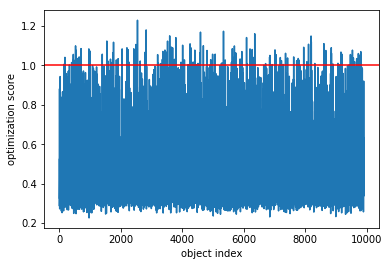

In [7]:
plt.plot(df["ratio"])
plt.xlabel("object index")
plt.ylabel("optimization score")
plt.axhline(1., c="r")

In [8]:
df = df[df["ratio"].le(0.999)]

print(f"dataset length is {len(df)}")

dataset length is 9760


### drop features with data leakage
before the optimization values of final stop band cannot be known
<br>the column success is the info from the future (successful convergence)

In [9]:
leakage = ["success", "ratio", "stopband_final"]
df = df.drop(leakage, axis=1)

## Clustering
if errorsets are close, the resulting optimal values are close as well
### the set of correctors (k1nl) is the target

In [10]:
target_cols = [name for name in df.columns if "k1nl" in name.lower()]

Y = df[target_cols]
X = df.copy().drop(target_cols, axis=1)

In [11]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_data = scaler_x.fit_transform(X)
y_data = scaler_y.fit_transform(Y)

X_scaled = pd.DataFrame(x_data, columns = X.columns)
Y_scaled = pd.DataFrame(y_data, columns=target_cols)

X_scaled.index = X.index
Y_scaled.index = Y.index

d_out = {
    'X':X_scaled, 
    'Y':Y_scaled,
    'X_initial':X,
    'Y_initial':Y,
    'scaler_x':scaler_x,
    'scaler_y':scaler_y
}

pickle.dump(d_out, open("./results/dataset_scaled.p", "wb"))

In [12]:
def clustering_score(df_target, df_cluster):
    columns = df_target.columns.tolist()
    df = df_cluster.join(df_target)
    out = []
    for name in columns:
        mse = np.std(df.groupby("Cluster")[name].transform("median") - df[name])**2
        out.append(mse)
    return np.max(df_target) / np.sqrt(np.mean(out))

In [13]:
d = {}
for i in range(2,50,5):
    X_cluster = X_scaled.copy()
    kmeans = KMeans(n_clusters=i, n_init=15)
    X_cluster["Cluster"] = kmeans.fit_predict(X_scaled)
    X_cluster["Cluster"] = X_cluster["Cluster"].astype('category')
    
    score = clustering_score(Y, X_cluster)
    
    print(f"n_clusters {i}, score = {np.mean(score)}")
    d[i] = np.mean(score)

n_clusters 2, score = 7.089336210639545
n_clusters 7, score = 7.094408386821885
n_clusters 12, score = 7.099415085217579
n_clusters 17, score = 7.100242489058684
n_clusters 22, score = 7.099900478868666
n_clusters 27, score = 7.107271497736772
n_clusters 32, score = 7.120888929047955
n_clusters 37, score = 7.118216749128696
n_clusters 42, score = 7.123238649045487
n_clusters 47, score = 7.127961446199193


Text(0, 0.5, 'signal to noise')

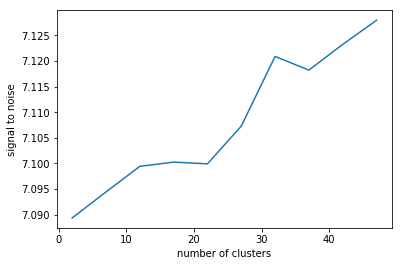

In [14]:
plt.plot(d.keys(), d.values())

plt.xlabel("number of clusters")
plt.ylabel("signal to noise")

## trade-off between n_clusters and signal / noise

In [15]:
n_clusters = 100

kmeans = KMeans(n_clusters=n_clusters, n_init=50)
X_scaled["Cluster"] = kmeans.fit_predict(X_scaled)
X_scaled["Cluster"] = X_scaled["Cluster"].astype('category')

# tmp dataframe with the target-vector
df = X_scaled.join(Y)

for name in target_cols:
    median = df.groupby("Cluster")[name].transform("median")
    X_scaled[f"{name}_median"] = median #(median - np.mean(median)) / np.std(median)

In [16]:
X_scaled.head()

,stopband_initial,s11dx1h,s12dx1h,s13dibpmh,s13dx1h,s14dx1h,s15dx1h,s16dx1h,s17dx1h,s18dx1h,...,K1NL_S24KM1Q_median,K1NL_S2EKM1Q_median,K1NL_S34KM1Q_median,K1NL_S3EKM1Q_median,K1NL_S44KM1Q_median,K1NL_S4EKM1Q_median,K1NL_S54KM1Q_median,K1NL_S5EKM1Q_median,K1NL_S64KM1Q_median,K1NL_S6EKM1Q_median
0,-0.628429,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,-1.0,1.0,...,-0.013608,-0.023719,-0.038567,-0.018056,0.023884,0.044430,-0.052658,0.012813,-0.018436,0.008569
1,-0.533234,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,-1.0,1.0,...,0.004863,-0.033314,0.008974,-0.010651,0.039226,-0.002095,-0.092715,0.030307,-0.065181,-0.011423
2,0.272420,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,-1.0,1.0,...,-0.127664,0.128135,0.012109,-0.454371,0.569387,0.407609,-0.135153,0.927274,-0.290654,0.179899
3,-0.257764,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,-1.0,1.0,...,-0.198138,-0.065388,0.004666,0.081840,-0.087701,-0.033529,-0.025926,-0.050764,0.015125,0.355418
4,-0.806637,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,-1.0,1.0,...,-0.016218,0.015798,-0.013631,0.017413,-0.008833,0.015681,-0.046091,0.003579,-0.008705,0.012419


## Pipeline algorithm 
get measurement -> clean data (if noise added) -> data normalization -> get cluster values -> initial guess (k1nl_median)

In [17]:
d_out = {
    'kmeans':kmeans, # to transform test data
    'X':X_scaled, 
    'Y':Y_scaled,
    'X_initial':X,
    'Y_initial':Y,
    'scaler_x':scaler_x,
    'scaler_y':scaler_y}

pickle.dump(d_out, open("./results/dataset_clustered.p", "wb"))